In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

the print("_______________") lines are used to separate the outputs so that its less confusing to view.

In [2]:
dataset = pd.read_csv("SwedishMotorInsurance.csv")
print(dataset)
x=dataset.iloc[:,-2:]
df=pd.DataFrame(x)
df.replace(0, np.nan, inplace=True)
x=df.values
y=dataset.iloc[:,-1].values
temp=dataset.iloc[:,-3].values
print("_______________________________________")
print(temp)
print("_______________________________________")

print(x)
print("____________")
#print(y)

#print("_______________________________")

      Kilometres  Zone  Bonus  Make  Insured  Claims  Payment
0              1     1      1     1   455.13     108   392491
1              1     1      1     2    69.17      19    46221
2              1     1      1     3    72.88      13    15694
3              1     1      1     4  1292.39     124   422201
4              1     1      1     5   191.01      40   119373
...          ...   ...    ...   ...      ...     ...      ...
2177           5     7      7     5     8.74       0        0
2178           5     7      7     6    16.61       0        0
2179           5     7      7     7     2.83       1      966
2180           5     7      7     8    13.06       0        0
2181           5     7      7     9   384.87      16   112252

[2182 rows x 7 columns]
_______________________________________
[455.13  69.17  72.88 ...   2.83  13.06 384.87]
_______________________________________
[[1.08000e+02 3.92491e+05]
 [1.90000e+01 4.62210e+04]
 [1.30000e+01 1.56940e+04]
 ...
 [1.00000e+00 9.6

In [3]:
print(x)
print("____________")

[[1.08000e+02 3.92491e+05]
 [1.90000e+01 4.62210e+04]
 [1.30000e+01 1.56940e+04]
 ...
 [1.00000e+00 9.66000e+02]
 [        nan         nan]
 [1.60000e+01 1.12252e+05]]
____________


In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, -2:])
x[:, -2:] = imputer.transform(x[:, -2:])
print(x)
print("___________________")
y=x[:,-1]
x=x[:,-2]
print(y)
print("_________________")

print(x)

[[1.08000000e+02 3.92491000e+05]
 [1.90000000e+01 4.62210000e+04]
 [1.30000000e+01 1.56940000e+04]
 ...
 [1.00000000e+00 9.66000000e+02]
 [6.29777407e+01 3.12070496e+05]
 [1.60000000e+01 1.12252000e+05]]
___________________
[392491.          46221.          15694.         ...    966.
 312070.49582638 112252.        ]
_________________
[108.          19.          13.         ...   1.          62.97774068
  16.        ]


In [5]:
print(x)

[108.          19.          13.         ...   1.          62.97774068
  16.        ]


In [6]:
x = np.hstack((temp.reshape(-1, 1), x.reshape(-1, 1)))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print(y_pred)



[  13584.9901477   283056.8394441   283080.61386528  271006.00962494
  255431.68362185   87137.8506168    26860.65802638  283266.10660197
   18042.69577429   13712.74500438  283096.28930781   17856.94178022
  283059.45201785   14082.16293351   17391.38113686   31218.82459286
   80286.37263104  129198.99504548   35638.12538524  270224.20189339
  763402.01534898  284244.77673106   27188.53603278   62701.26434144
   45015.43967853   46525.11376858   26882.8649033   283259.83642496
   94019.23760706  283123.72133226   80986.14885665  557387.03219912
   14222.98065897  398446.88789989   56949.67659706  283510.38224818
 1077504.27096854  283144.36066493  356118.97983067  121624.22436031
   28333.88836752   71276.25061419   13611.37714264 5558937.80500256
   18014.21872035   39946.39179297   36494.26580516   29041.63459809
 1917670.43303786   22482.1133846    31685.16900835  283057.62321622
  909409.80382112  334195.58701516   57887.46491187  175782.63692992
  409034.07516969  116740.27898038

The following code is problematic:

ValueError: ignored

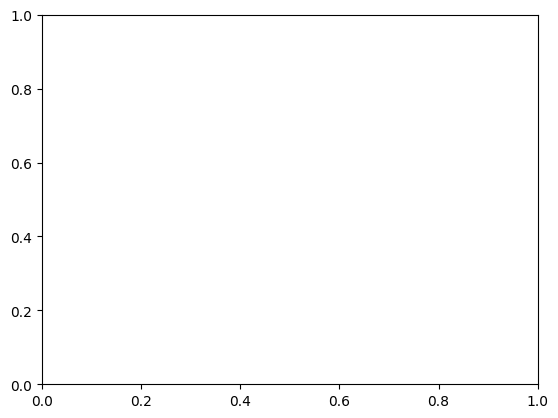

In [9]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
#plt.title('Salary vs Experience (Training set)')
#plt.xlabel('Years of Experience')
#plt.ylabel('Salary')
plt.show()


model.score(x_test, y_test)
